In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [3]:
filename = "/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv"
data = pd.read_csv(filename)
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [5]:
data.describe(include='all')

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


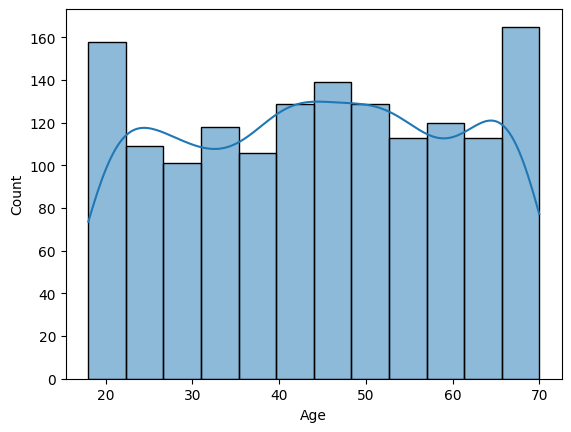

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


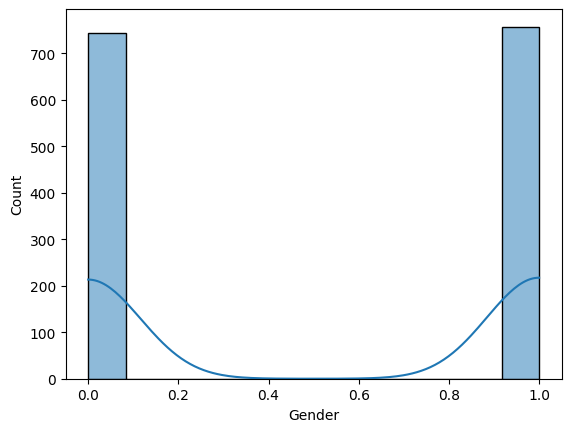

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


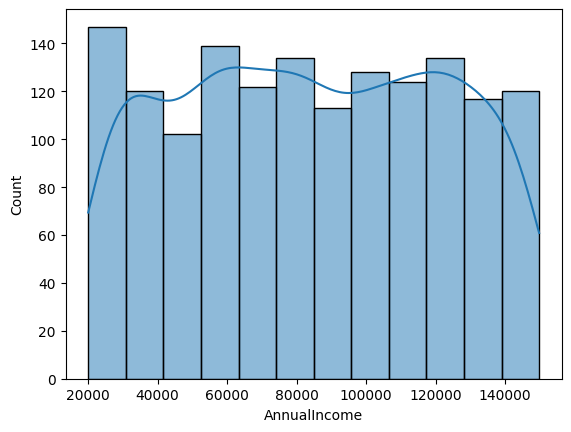

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


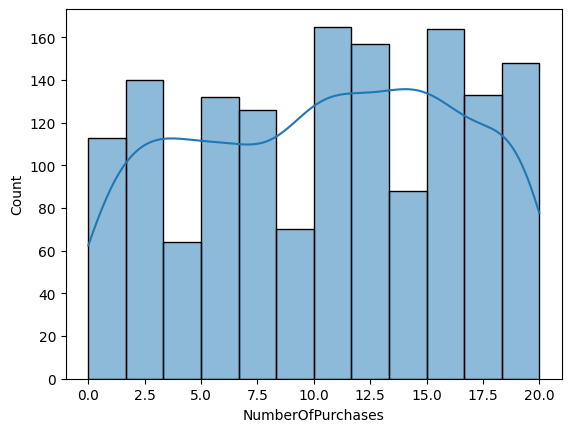

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


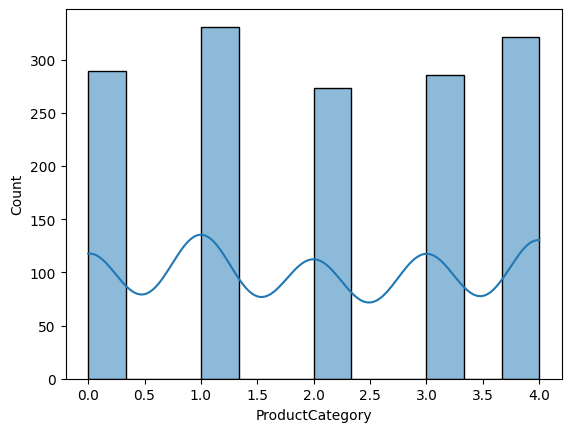

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


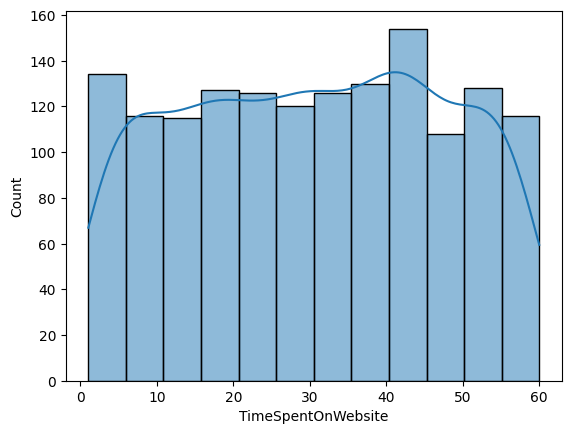

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


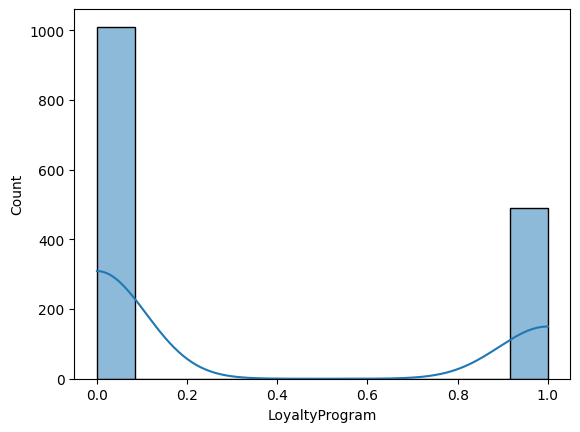

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


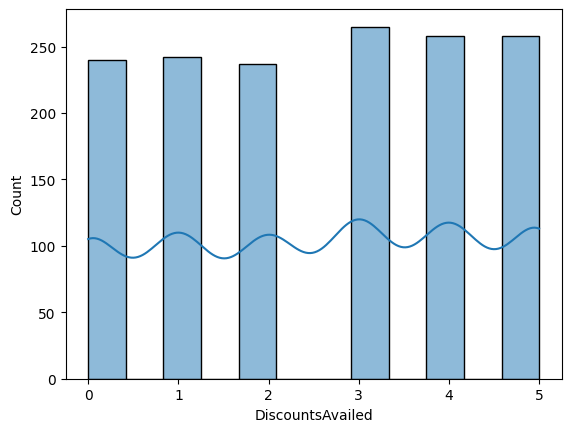

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


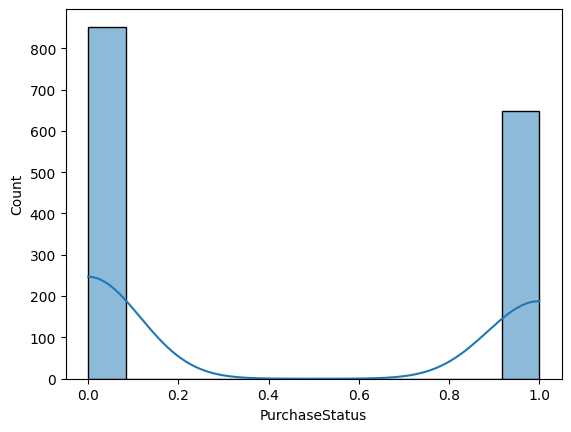

In [6]:
columns = data.columns

for column in columns:
    sns.histplot(data[column], kde=True)
    plt.show()

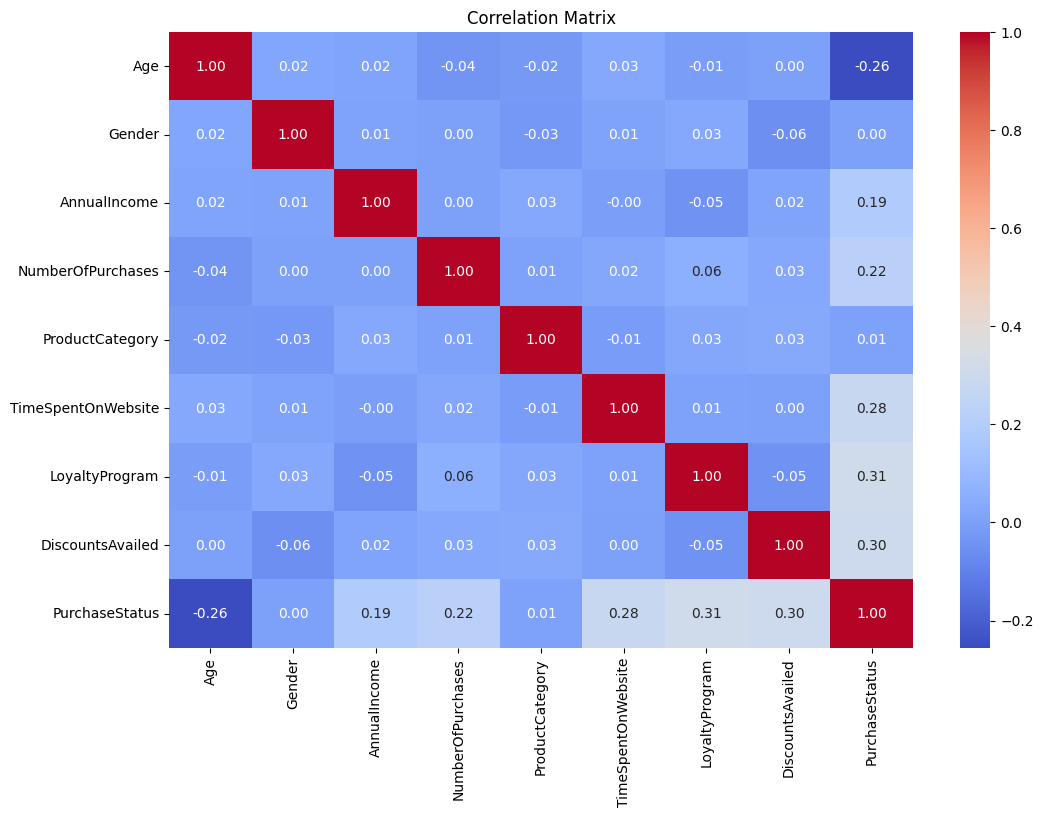

In [7]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

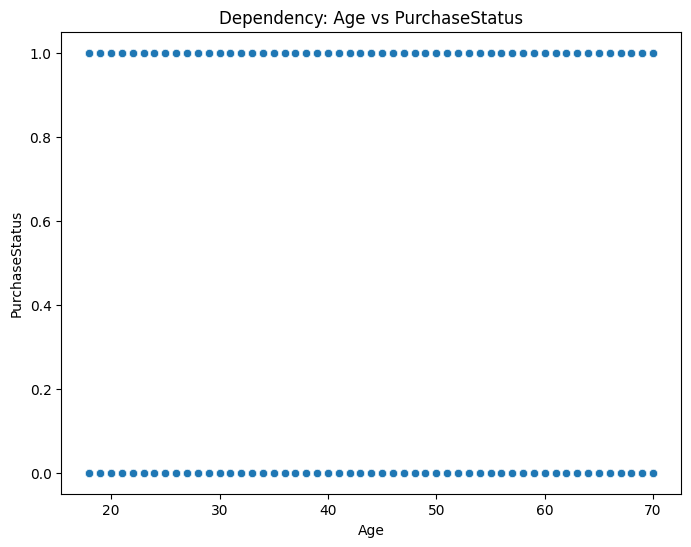

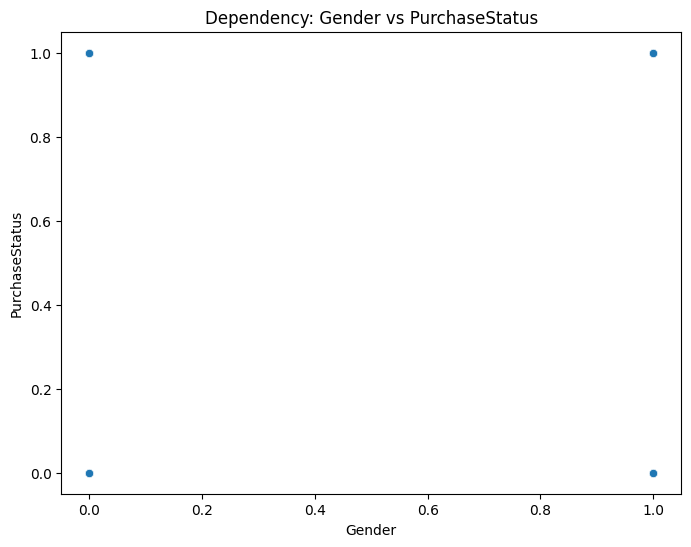

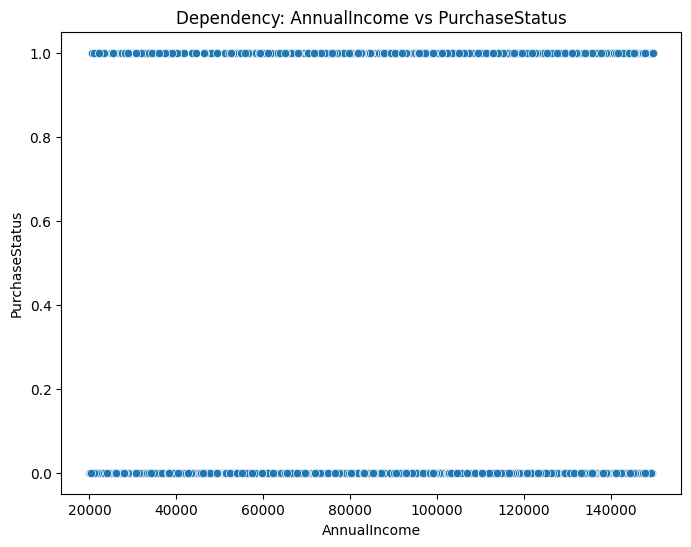

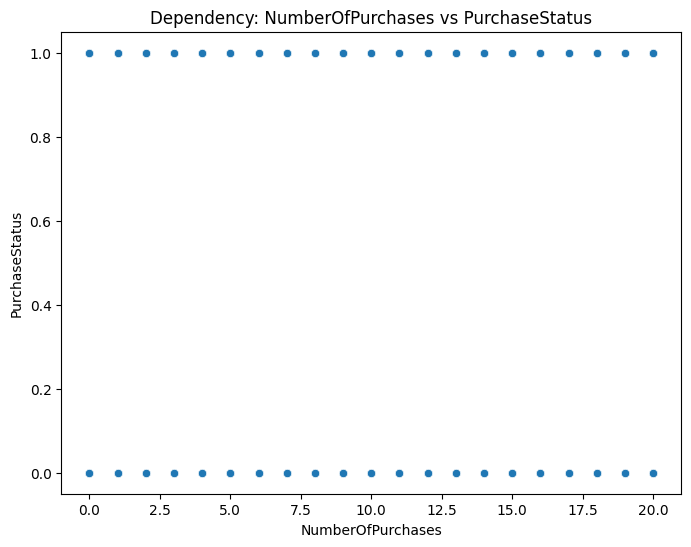

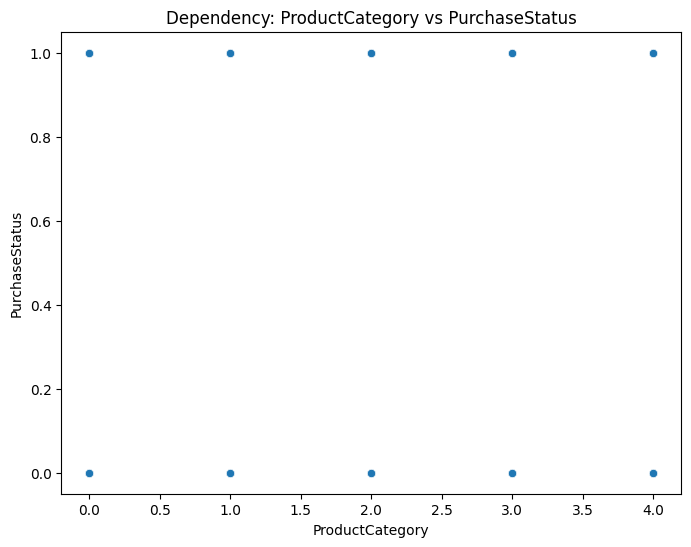

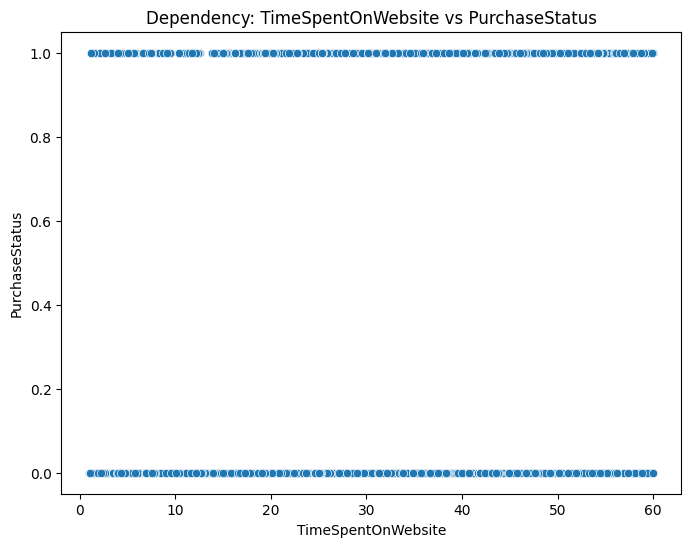

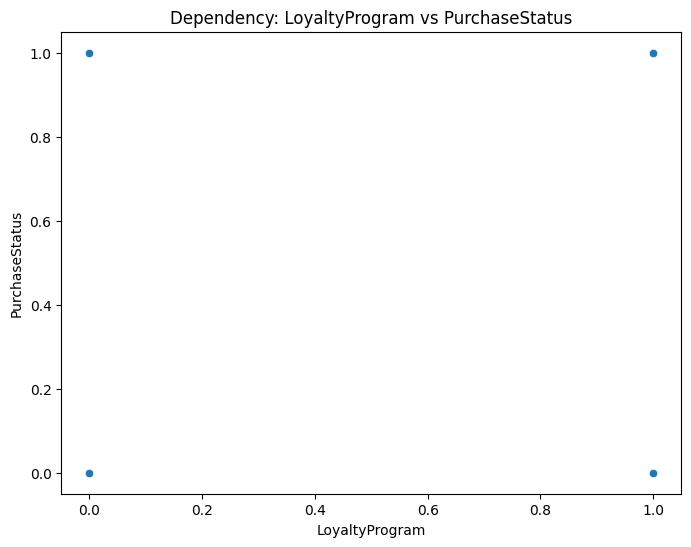

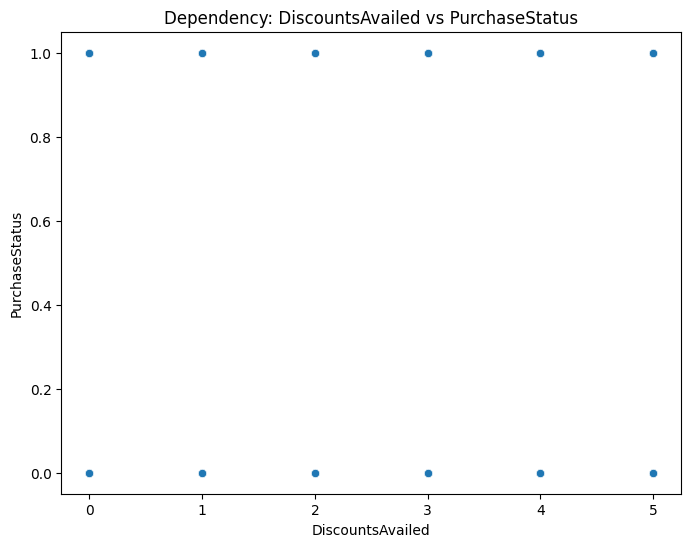

In [8]:
selected_features = data.columns[:-1] 
target = data.columns[-1] 

# Create scatterplots for each selected feature against the target
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Dependency: {feature} vs {target}')
    plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
# Select the columns to normalize
columns_to_normalize = ["Age", "Gender", "NumberOfPurchases", "ProductCategory", "LoyaltyProgram", "DiscountsAvailed", "AnnualIncome", "TimeSpentOnWebsite"]

# Define the data to normalize
data_to_normalize = data[columns_to_normalize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
normalized_data = scaler.fit_transform(data_to_normalize)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Display the first few rows of the normalized data
normalized_df.head()

,Age,Gender,NumberOfPurchases,ProductCategory,LoyaltyProgram,DiscountsAvailed,AnnualIncome,TimeSpentOnWebsite
0,-0.276761,0.99071,-0.411185,-1.409895,-0.696526,1.434172,-0.481934,0.005864
1,-1.564418,0.99071,-1.090830,-0.008873,-0.696526,1.434172,-1.612821,0.457694
2,-1.113738,0.99071,0.098548,-0.008873,1.435697,-1.499095,1.158311,0.068566
3,-1.306887,0.99071,1.457838,0.691638,-0.696526,0.847519,1.423546,0.924570
4,-0.856207,0.99071,1.457838,-0.709384,-0.696526,-1.499095,0.400133,-0.626987


In [11]:
from sklearn.model_selection import train_test_split

# Select features and target
X = normalized_df
y = data['PurchaseStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.86
Confusion Matrix:
[[223  34]
 [ 31 162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       257
           1       0.83      0.84      0.83       193

    accuracy                           0.86       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.86      0.86      0.86       450



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[249   8]
 [ 18 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       257
           1       0.96      0.91      0.93       193

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

XGBoost Accuracy: 0.92
Confusion Matrix:
[[242  15]
 [ 20 173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       257
           1       0.92      0.90      0.91       193

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [15]:
import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=0)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"LightGBM Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

[LightGBM] [Info] Number of positive: 455, number of negative: 595
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 1050, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268264
[LightGBM] [Info] Start training from score -0.268264
LightGBM Accuracy: 0.92
Confusion Matrix:
[[244  13]
 [ 22 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       257
           1       0.93      0.89      0.91       193

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [16]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
cat_model = CatBoostClassifier(random_state=0, silent=True)

# Train the model
cat_model.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"CatBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

CatBoost Accuracy: 0.95
Confusion Matrix:
[[250   7]
 [ 16 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       257
           1       0.96      0.92      0.94       193

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.95       450
weighted avg       0.95      0.95      0.95       450



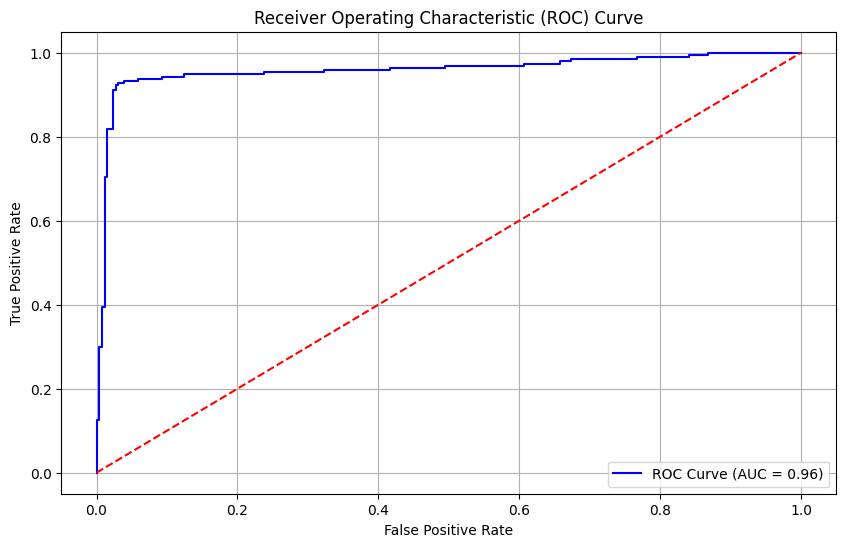

AUC Score: 0.96


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
y_pred_proba = cat_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.2f}")

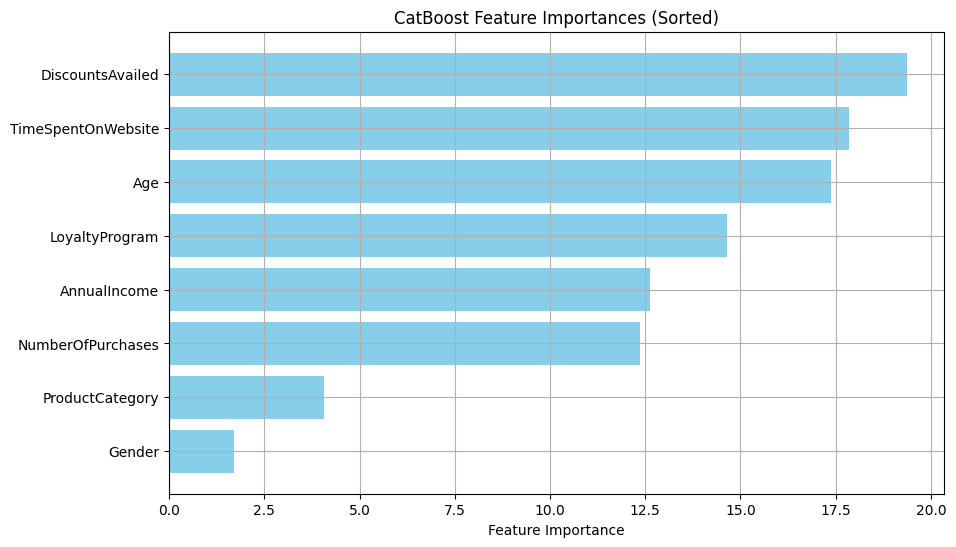

In [18]:
# Get feature importances and corresponding feature names
feature_importances = cat_model.get_feature_importance()
features = X.columns

# Sort the feature importances and features
sorted_idx = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_idx]
sorted_features = features[sorted_idx]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importances (Sorted)')
plt.grid(True)
plt.show()

Age
18    23
29    22
22    21
20    20
32    20
19    19
31    19
50    18
25    18
39    17
Name: count, dtype: int64


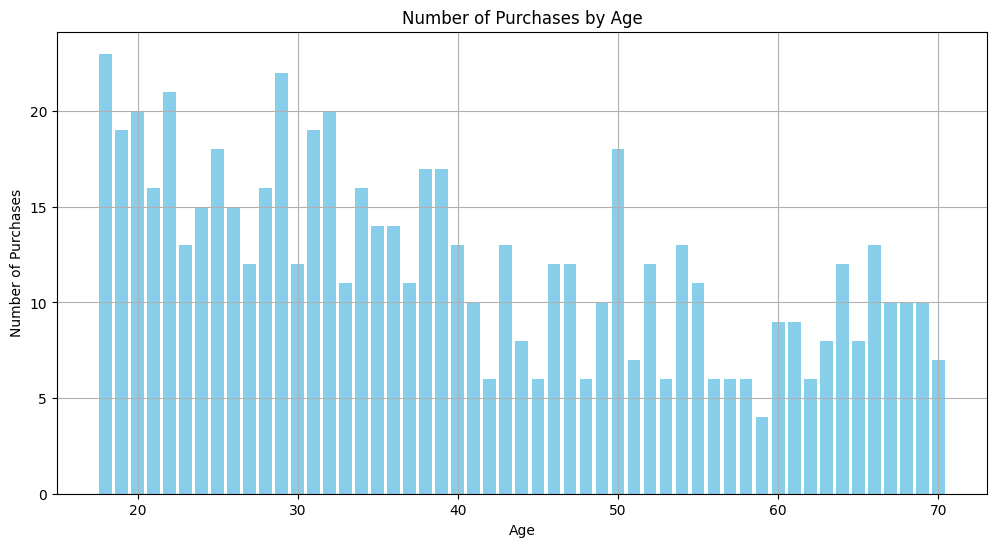

In [19]:
# Filter the data to include only rows where PurchaseStatus is 1
purchases = data[data['PurchaseStatus'] == 1]

# Count the number of purchases by age
purchases_by_age = purchases['Age'].value_counts().sort_index()

# Display the ages with the most purchases
print(purchases_by_age.sort_values(ascending=False).head(10))  # Top 10 ages with the most purchases

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(purchases_by_age.index, purchases_by_age.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Age')
plt.grid(True)
plt.show()

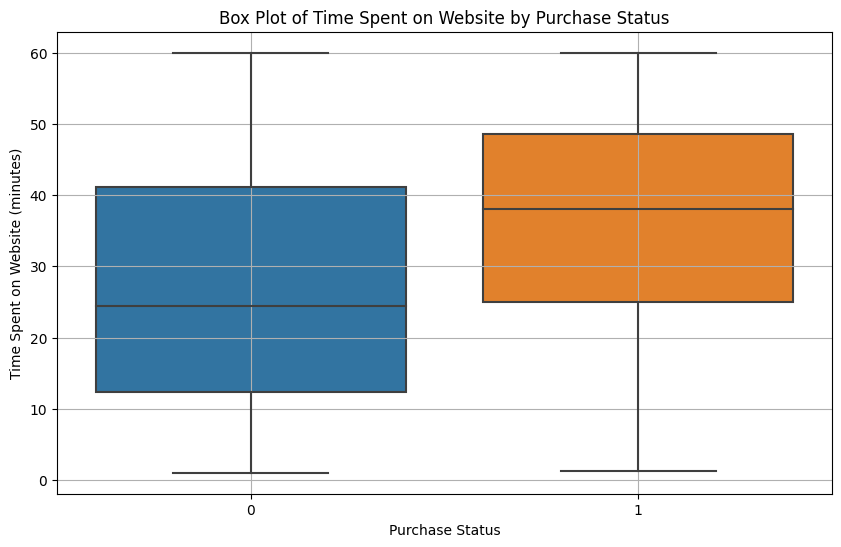

In [20]:
import seaborn as sns

# Plot a box plot of Time Spent on Website by Purchase Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='PurchaseStatus', y='TimeSpentOnWebsite', data=data)
plt.xlabel('Purchase Status')
plt.ylabel('Time Spent on Website (minutes)')
plt.title('Box Plot of Time Spent on Website by Purchase Status')
plt.grid(True)
plt.show()

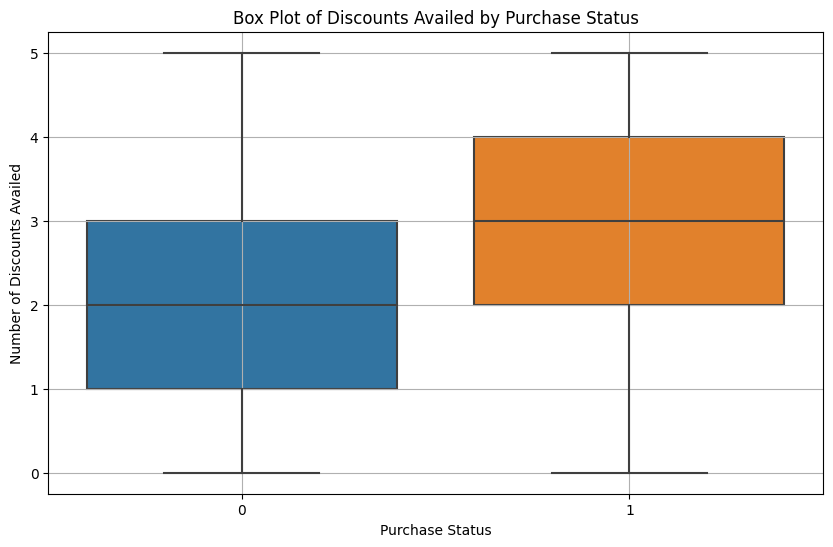

In [21]:
import seaborn as sns

# Plot a box plot of Discounts Availed by Purchase Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='PurchaseStatus', y='DiscountsAvailed', data=data)
plt.xlabel('Purchase Status')
plt.ylabel('Number of Discounts Availed')
plt.title('Box Plot of Discounts Availed by Purchase Status')
plt.grid(True)
plt.show()